# MNIST dataset

In [8]:
from __future__ import division

In [28]:
import numpy as np

In [16]:
import keras

In [10]:
from keras.models import Sequential

In [15]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Flatten

### Dataset loading

In [1]:
from keras.datasets import mnist

In [53]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train[:,:,:,np.newaxis]
x_test = x_test[:,:,:,np.newaxis]

In [54]:
# To categorical 

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

### Sample visualization

In [32]:
import matplotlib.pyplot as plt

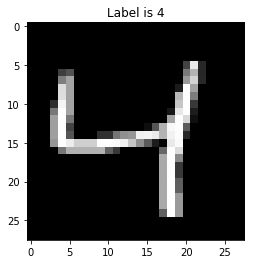

In [35]:
sample_index = 2

pixels = x_train[sample_index]
label = y_train[sample_index]

plt.title('Label is {label}'.format(label=label))
plt.imshow(pixels[:,:,0], cmap='gray')
plt.show()

### Define network architecture

In [34]:
model = Sequential()

# Two conv2d (32) + maxpool + dropout
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:], activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# Output size = 14 x 14 x 32

# Two conv2d (32) + maxpool + dropout
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# Output size = 7 x 7 x 64

# Flatten
model.add(Flatten())

# First FC layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))

# Output layer
model.add(Dense(10, activation='softmax'))

# initiate Adam optimizer
opt = keras.optimizers.Adam(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

### Train model

In [55]:
# Various hyperparameters
batch_size = 128
epochs = 20

In [56]:
model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test),
    shuffle=True
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 31s 515us/step - loss: 1.4474 - acc: 0.7684 - val_loss: 0.1164 - val_acc: 0.9649
Epoch 2/20
60000/60000 [==============================] - 28s 459us/step - loss: 0.2010 - acc: 0.9376 - val_loss: 0.0623 - val_acc: 0.9795
Epoch 3/20
60000/60000 [==============================] - 29s 487us/step - loss: 0.1283 - acc: 0.9603 - val_loss: 0.0449 - val_acc: 0.9844
Epoch 4/20
60000/60000 [==============================] - 28s 465us/step - loss: 0.0968 - acc: 0.9696 - val_loss: 0.0369 - val_acc: 0.9881
Epoch 5/20
60000/60000 [==============================] - 29s 481us/step - loss: 0.0816 - acc: 0.9743 - val_loss: 0.0338 - val_acc: 0.9889
Epoch 6/20
60000/60000 [==============================] - 29s 484us/step - loss: 0.0672 - acc: 0.9788 - val_loss: 0.0293 - val_acc: 0.9892
Epoch 7/20
60000/60000 [==============================] - 26s 439us/step - loss: 0.0588 - acc: 0.9814 - val_loss: 0.